In [5]:
import numpy as np
rng = np.random.default_rng()

samples = 200
xs = np.linspace(0, 5, samples)
# noise +- 0.5
noise = rng.random(samples) - 0.5
print(noise)
signal = 5 * (1 + (np.sin(xs) + 1/3 * np.sin(3 * xs)))
print(signal)

[-1.48448997e-01 -5.08664003e-02  4.54972105e-01 -4.77866396e-02
 -1.20845146e-02  4.64916695e-01 -4.70487601e-01  4.42017910e-02
 -2.09900451e-01 -3.84184602e-01 -2.28175696e-01  9.39680880e-02
  3.27555866e-02  4.39466144e-01  4.71088435e-01  4.41215030e-02
 -1.95699979e-01  2.69369762e-01 -4.87513469e-01 -1.15346570e-01
  1.14705055e-01  2.76944451e-01 -4.29770210e-01  2.76828028e-02
 -2.41426845e-01 -3.21103435e-01 -4.41862721e-02 -2.18624211e-01
  3.28344208e-01  2.77528173e-01 -3.09281517e-01  4.11734887e-01
 -3.18188146e-01  3.56492494e-01  5.04659717e-03  2.29020486e-01
 -4.94636206e-01  3.80570247e-01  3.88340787e-02 -8.70986702e-02
  3.71995061e-01  4.13307648e-01  4.71765558e-02 -3.77966269e-01
 -4.50255600e-01  2.91010429e-01  4.51985010e-01 -1.60357270e-01
 -3.65148846e-01  4.42318597e-01 -3.10215147e-01 -2.58668430e-01
 -4.65779544e-01  1.05919146e-01 -4.81072435e-02 -1.93307561e-01
 -1.53860807e-02  3.80424768e-01  3.40502366e-01  2.56568035e-01
 -3.21759067e-01  4.48856

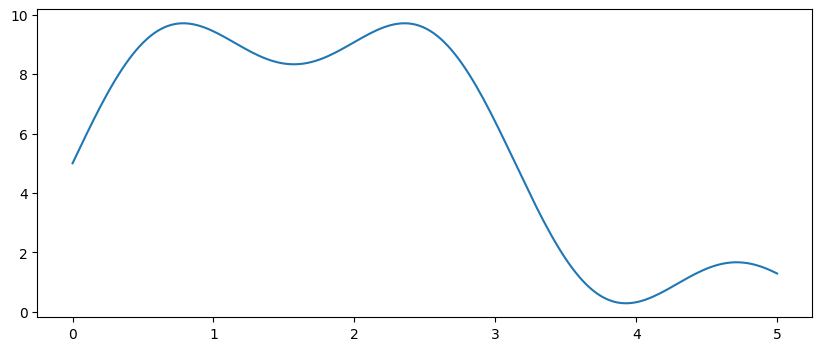

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(xs, signal)
plt.show()

In [8]:
def find_peaks_naive(signal):
    peaks = []
    for i in range(1, len(signal) - 1):
        if signal[i] > signal[i - 1] and signal[i] > signal[i + 1]:
            peaks.append((i, signal[i]))
    return peaks

print(find_peaks_naive(signal))

[(31, 9.713744826510357), (94, 9.71382147480417), (188, 1.666036288220622)]


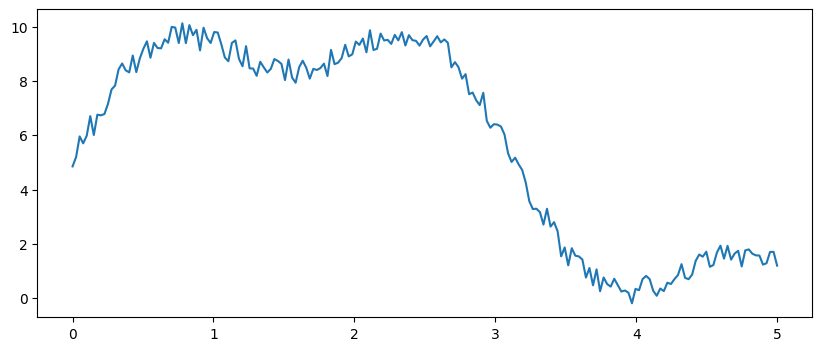

In [13]:
noisy_signal = signal + noise

plt.figure(figsize=(10, 4))
plt.plot(xs, noisy_signal)
plt.show()

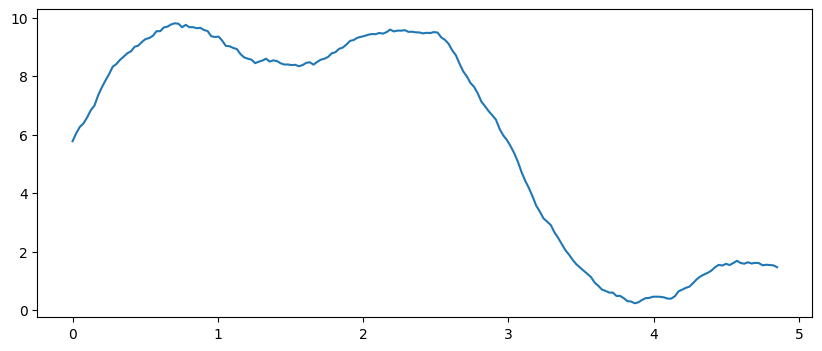

[(26, 9.732759634641399), (59, 8.39741587654373), (87, 9.543835239960485), (157, 0.4329614338450969), (181, 1.6199671502708846)]
[(29, 9.704713513439234), (92, 9.704805670515984), (186, 1.6597431497751578)]


In [33]:
def get_moving_average(signal, window_size=5):
    window_sum = np.sum(signal[:window_size])
    avgs = [window_sum / window_size]
    for i in range(len(signal) - (window_size)):
      window_sum = window_sum - signal[i] + signal[i + window_size]
      avgs.append(window_sum/window_size)
    return np.array(avgs)

def find_peaks_moving_average(signal, window_size=5):
    """
      0   1   2   3   4    5   6   7   8   9    10
     [3   5   7   9   11]  9   7   8   10  11   5
      3  [5   7   9   11   9]  7   8   10  11   5
    """
    moving_average = get_moving_average(signal, window_size=window_size)
    return find_peaks_naive(moving_average)
    
window_size = 7

signal_moving_average = get_moving_average(noisy_signal, window_size=window_size)
plt.figure(figsize=(10, 4))
plt.plot(xs[:len(xs) - window_size + 1], signal_moving_average)
plt.show()

print(find_peaks_moving_average(signal_moving_average, window_size=7))
print(find_peaks_moving_average(signal, window_size=5))

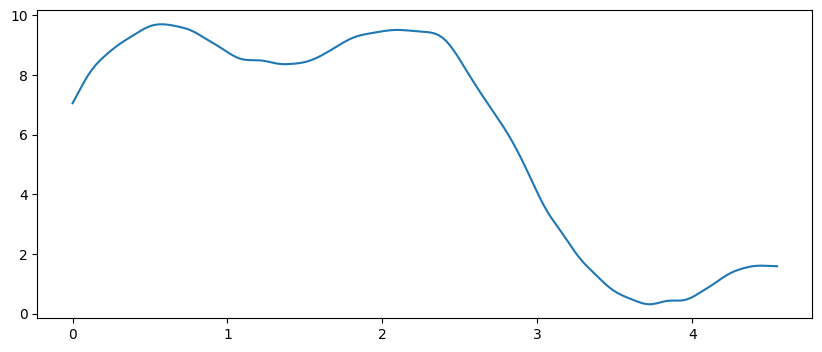

[(17, 9.647806914745745), (78, 9.470877564925347)]
[(31, 9.713744826510357), (94, 9.71382147480417), (188, 1.666036288220622)]


In [41]:
from gaussian import get_gaussian_window

def get_gaussian_moving_average(signal, stddev, stddevs_from_mean=3):
    window_size = int(2 * stddevs_from_mean * stddev)
    gaussian_window = get_gaussian_window(window_size, stdevs_from_mean=stddevs_from_mean)
    avgs = []
    for i in range(len(signal) - window_size):
        weighted_sum = np.sum(gaussian_window * signal[i : i + window_size])
        avgs.append(weighted_sum)
    return np.array(avgs)
    

def find_peaks_gaussian(signal, stddev):
    gaussian_smoothed_signal = get_gaussian_moving_average(signal, stddev)
    return find_peaks_naive(gaussian_smoothed_signal)

gaussian_moving_average = get_gaussian_moving_average(noisy_signal, 3)
plt.figure(figsize=(10, 4))
plt.plot(xs[:len(gaussian_moving_average)], gaussian_moving_average)
plt.show()

print(find_peaks_gaussian(gaussian_moving_average, 2))
print(find_peaks_naive(signal))
